# Credit Card Fraud Detection

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
data=pd.read_csv(r"creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Dataset Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Visualising Data

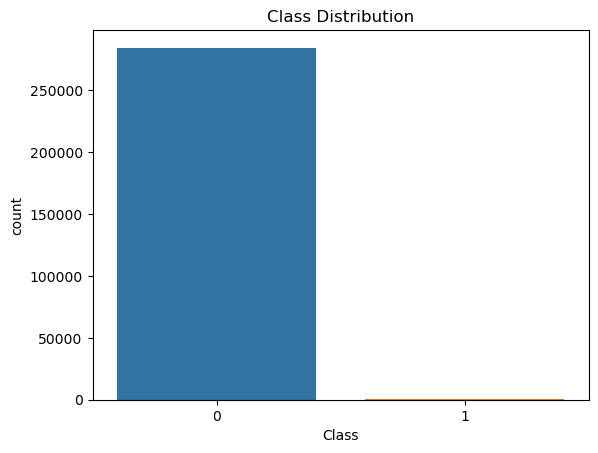

In [4]:
# Distribution of the 'Class' column (target variable)
sns.countplot(data=data, x='Class')
plt.title('Class Distribution')
plt.show()

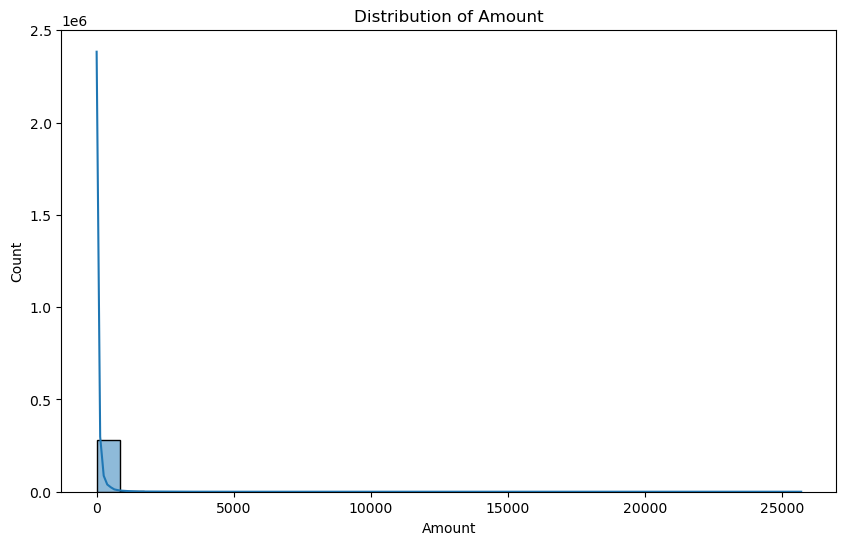

In [5]:
# Distribution of the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Amount', bins=30, kde=True)
plt.title('Distribution of Amount')
plt.show()

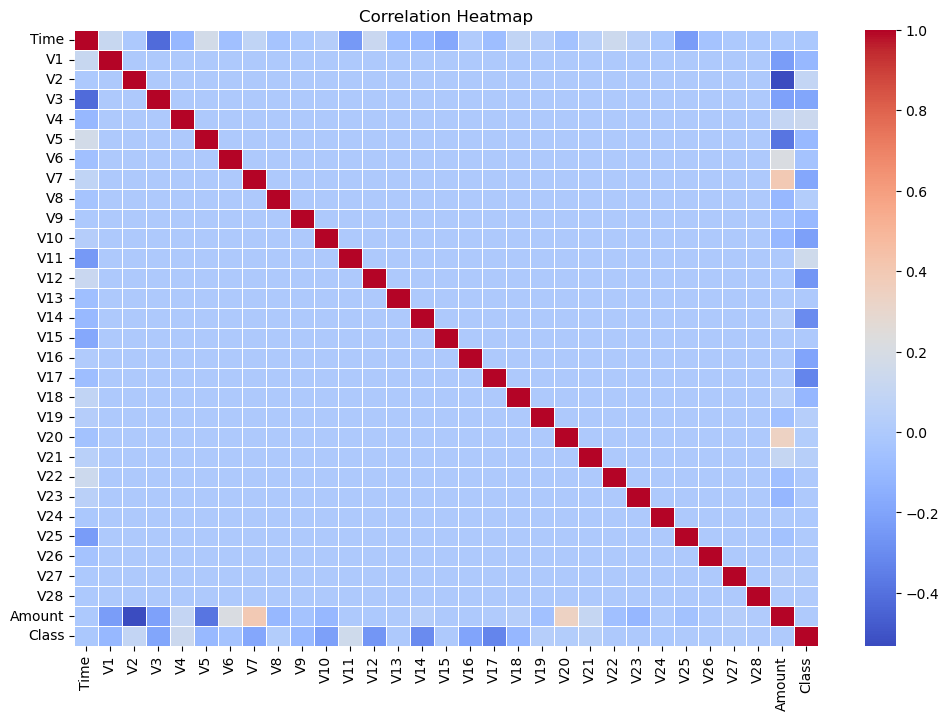

In [6]:
# Correlation heatmap of the numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


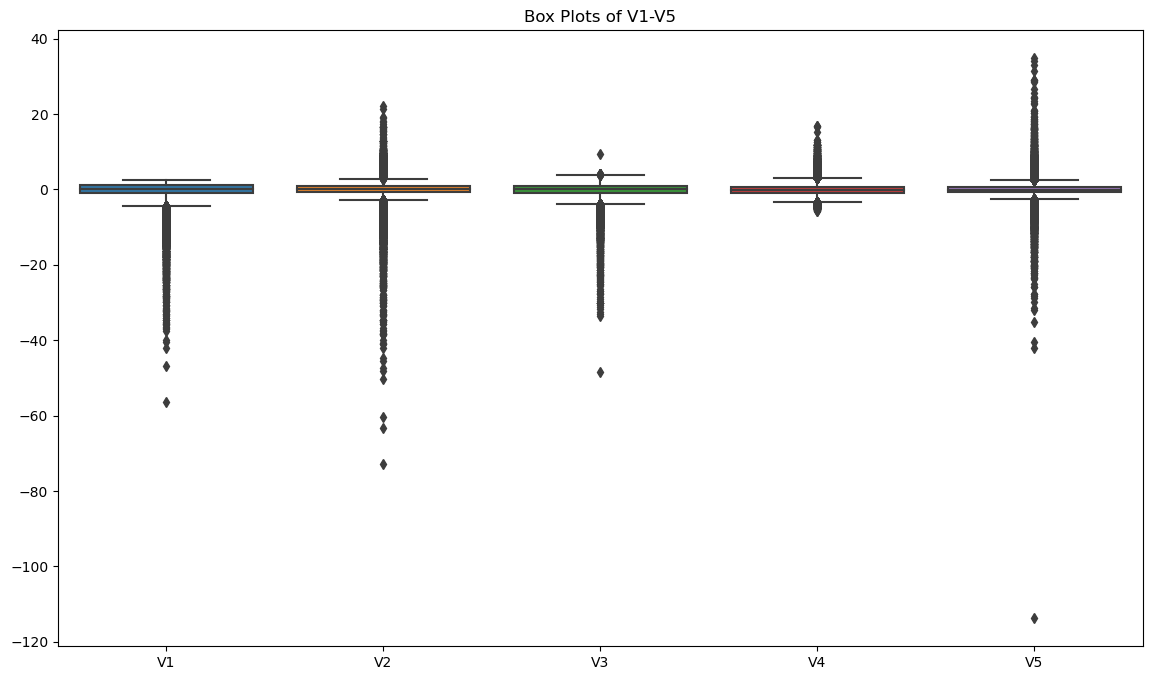

In [7]:
# Box plots for some of the numerical features
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[['V1', 'V2', 'V3', 'V4', 'V5']])
plt.title('Box Plots of V1-V5')
plt.show()

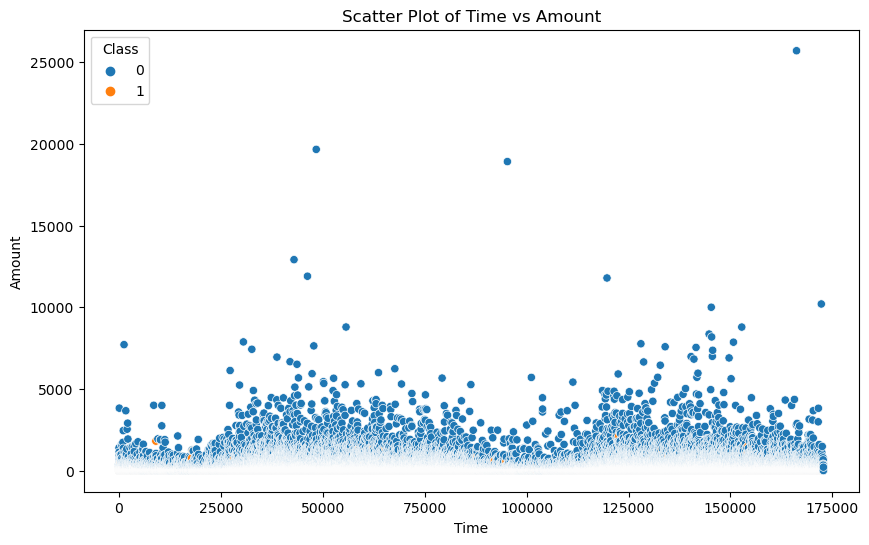

In [8]:
# Scatter plot for Time vs Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class')
plt.title('Scatter Plot of Time vs Amount')
plt.show()

### Training and Testing of Data

In [9]:
# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression Model

In [11]:
# Create a logistic regression model
logistic_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = logistic_reg.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", confusion_lr)
print("Classification Report:\n", classification_rep_lr)

Accuracy: 0.9986482216214319
Confusion Matrix:
 [[56829    35]
 [   42    56]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.57      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.79      0.80     56962
weighted avg       1.00      1.00      1.00     56962



### Random Forest Model

In [12]:
# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_rf)
print("Classification Report:\n", classification_rep_rf)

Accuracy: 0.9995611109160493
Confusion Matrix:
 [[56862     2]
 [   23    75]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### XG Boost Classifier

In [13]:
# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print("Accuracy:", accuracy_xgb)
print("Confusion Matrix:\n", confusion_xgb)
print("Classification Report:\n", classification_rep_xgb)

Accuracy: 0.9996137776061234
Confusion Matrix:
 [[56863     1]
 [   21    77]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962



### Result Comparison

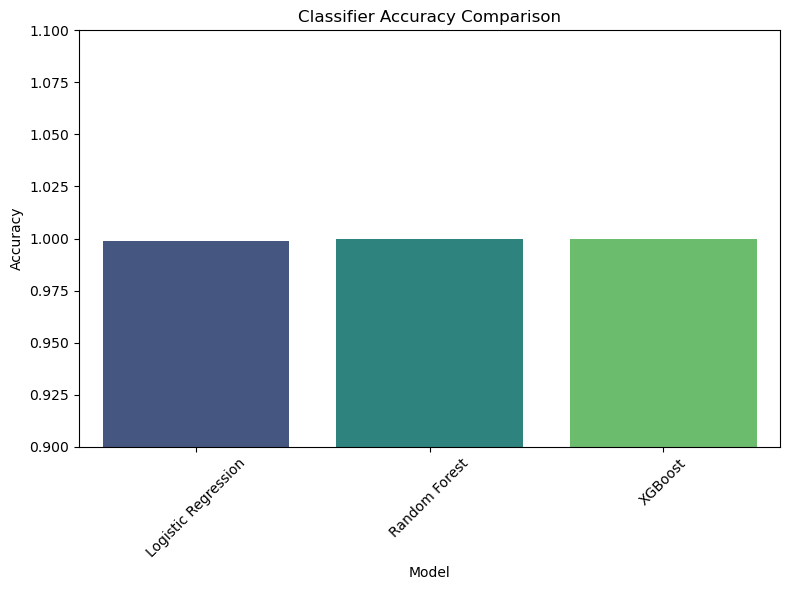

In [14]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_xgb]
})

# Create a bar plot to compare accuracies
plt.figure(figsize=(8, 6))
sns.barplot(data=results, x='Model', y='Accuracy', palette='viridis')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0.9, 1.1)  # Adjust the y-axis limits for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Calculate precision, recall, and F1 Score for each model
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]
})

# Set 'Metric' column as the index
metrics_df = metrics_df.set_index('Metric')

# Print the metrics table
print(metrics_df)

           Logistic Regression  Random Forest   XGBoost
Metric                                                 
Accuracy              0.998648       0.999561  0.999614
Precision             0.615385       0.974026  0.987179
Recall                0.571429       0.765306  0.785714
F1 Score              0.592593       0.857143  0.875000


### Identifying the fraud

In [16]:
# Detect fraud using the trained model
fraud_predictions = random_forest.predict(X)  # Use the entire dataset for predictions

# Add the predictions to the original dataset
data['Fraud_Predictions'] = fraud_predictions

# You can now analyze the 'Fraud_Predictions' column to detect fraud cases
fraudulent_transactions = data[data['Fraud_Predictions'] == 1]
print("Detected fraud cases:\n", fraudulent_transactions)

Detected fraud cases:
             Time        V1        V2        V3        V4        V5        V6  \
472        347.0 -1.531271  1.399621 -0.587061  2.175002 -2.137637 -0.501576   
541        406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623        472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7